## **SETD2 with SAM, analysis**

## **Import modules**

In [1]:
import os
import sys

data_path=os.path.abspath('/media/dataHog/hca/SETD2') #Where your group data is
base_path=os.path.abspath('/media/dataHog/hca/SimFound_v2/source/') #Where your source code is (SFv2)

sys.path.append(base_path)
sys.path.append(data_path)

import importlib

import warnings
warnings.filterwarnings('ignore')
import Protocols as P

import main
import tools
import Trajectory
import MSM
import Featurize as F
import Discretize


from simtk.unit import *

## **Define Project**

In [2]:
importlib.reload(Trajectory)
importlib.reload(main)

workdir=data_path
results=workdir+'/results'
inputs=workdir+'inputs/structures/'

workdir=tools.Functions.fileHandler([workdir], _new=False)
tools.Functions.fileHandler([results, inputs])


#protein=['WT', 'R167Q', 'I602G']
protein=['setd2_open']

ligand=['SAM']
parameters=['310K']
timestep=20*picoseconds

project=main.Project(title='SETD2-SAM', 
                     hierarchy=('protein', 'ligand', 'parameter'), 
                     workdir=workdir,
                     parameter=parameters, 
                     replicas=25, 
                     protein=protein, 
                     ligand=ligand, 
                     results=results,
                     topology='wt_SETD2.pdb',
                     timestep=timestep,
                    initial_replica=1)


project_systems=project.setSystems()

Converted parameter "temperature" (in K) into scalar: 310.0 K
System defined: ('setd2_open', 'SAM', '310K', '1'), ID: 310.0 K
System defined: ('setd2_open', 'SAM', '310K', '2'), ID: 310.0 K
System defined: ('setd2_open', 'SAM', '310K', '3'), ID: 310.0 K
System defined: ('setd2_open', 'SAM', '310K', '4'), ID: 310.0 K
System defined: ('setd2_open', 'SAM', '310K', '5'), ID: 310.0 K
System defined: ('setd2_open', 'SAM', '310K', '6'), ID: 310.0 K
System defined: ('setd2_open', 'SAM', '310K', '7'), ID: 310.0 K
System defined: ('setd2_open', 'SAM', '310K', '8'), ID: 310.0 K
System defined: ('setd2_open', 'SAM', '310K', '9'), ID: 310.0 K
System defined: ('setd2_open', 'SAM', '310K', '10'), ID: 310.0 K
System defined: ('setd2_open', 'SAM', '310K', '11'), ID: 310.0 K
System defined: ('setd2_open', 'SAM', '310K', '12'), ID: 310.0 K
System defined: ('setd2_open', 'SAM', '310K', '13'), ID: 310.0 K
System defined: ('setd2_open', 'SAM', '310K', '14'), ID: 310.0 K
System defined: ('setd2_open', 'SAM',

## Featurization


In [3]:
import Featurize as F
importlib.reload(main)

importlib.reload(F)
importlib.reload(Trajectory)

featurized={}
featurize=F.Featurize(project_systems, results=results, timestep=timestep)




Results will be stored under:  /media/dataHog/hca/SETD2/results


In [4]:
ref_structures=['SETD2', 'SETD2_complexed_noSub']

for ref in ref_structures:

    featurize.calculate(('backbone', f'{project.def_input_struct}/{ref}.pdb'), 
                                       method='RMSD',  
                                       n_cores=12,
                                       feature_name=f'RMSD_bb_SETD2_vs_{ref}')

Selected method: RMSD using the function "rmsd_calculation"
Performing rmsd_calculation tasks for 25 elements on 12 logical cores.
Pooling results of 25 tasks..
Featurization updated:  ['RMSD_bb_SETD2_vs_SETD2']
Selected method: RMSD using the function "rmsd_calculation"
Performing rmsd_calculation tasks for 25 elements on 12 logical cores.
Pooling results of 25 tasks..
Featurization updated:  ['RMSD_bb_SETD2_vs_SETD2', 'RMSD_bb_SETD2_vs_SETD2_complexed_noSub']


In [5]:

distance_SAM=['resid 248 and name ZN', 'resname SAM and name N6']

featurized[f'distance_SAM_Zn']=featurize.calculate(distance_SAM, 
                                                   method='distance', 
                                                   feature_name=f'SAM-Zn',
                                                   n_cores=12)    

Selected method: distance using the function "distance_calculation"
Performing distance_calculation tasks for 25 elements on 12 logical cores.
setd2_open-SAM-310K-10 
	Number of frames: 1928
	Selections: 1
	References: 1
	Limits: 4.71 and 7.34
setd2_open-SAM-310K-9 
	Number of frames: 2229
	Selections: 1
	References: 1
	Limits: 4.74 and 6.99
setd2_open-SAM-310K-8 
	Number of frames: 2911
	Selections: 1
	References: 1
	Limits: 4.68 and 7.08
setd2_open-SAM-310K-5 
	Number of frames: 2910
	Selections: 1
	References: 1
	Limits: 4.67 and 7.12
setd2_open-SAM-310K-6 
	Number of frames: 2913
	Selections: 1
	References: 1
	Limits: 4.64 and 7.22
setd2_open-SAM-310K-7 
	Number of frames: 2916
	Selections: 1
	References: 1
	Limits: 4.54 and 9.33
setd2_open-SAM-310K-15 
	Number of frames: 4005
	Selections: 1
	References: 1
	Limits: 4.58 and 6.65
setd2_open-SAM-310K-4 
	Number of frames: 2919
	Selections: 1
	References: 1
	Limits: 4.78 and 7.03
setd2_open-SAM-310K-17 
	Number of frames: 2876
	Select

In [6]:
distance_R1670=['resid 1670 and name NH1', 'resname SAM and name SD']
featurized[f'distance_R1670_SAM']=featurize.calculate(distance_R1670, 
                                                      method='distance', 
                                                      feature_name=f'R1670_SAM', 
                                                      n_cores=4)

Selected method: distance using the function "distance_calculation"
Performing distance_calculation tasks for 25 elements on 4 logical cores.
setd2_open-SAM-310K-5 
	Number of frames: 2910
	Selections: 1
	References: 1
	Limits: 14.81 and 20.01
setd2_open-SAM-310K-7 
	Number of frames: 2916
	Selections: 1
	References: 1
	Limits: 12.41 and 18.91
setd2_open-SAM-310K-6 
	Number of frames: 2913
	Selections: 1
	References: 1
	Limits: 12.79 and 19.25
setd2_open-SAM-310K-8 
	Number of frames: 2911
	Selections: 1
	References: 1
	Limits: 10.44 and 21.58
setd2_open-SAM-310K-9 
	Number of frames: 2229
	Selections: 1
	References: 1
	Limits: 14.92 and 19.97
setd2_open-SAM-310K-10 
	Number of frames: 1928
	Selections: 1
	References: 1
	Limits: 10.7 and 17.26
setd2_open-SAM-310K-13 
	Number of frames: 4795
	Selections: 1
	References: 1
	Limits: 9.04 and 17.42
setd2_open-SAM-310K-1 
	Number of frames: 24999
	Selections: 1
	References: 1
	Limits: 6.41 and 20.29
setd2_open-SAM-310K-14 
	Number of frames:

In [7]:
featurized['RMSF']=featurize.calculate('protein and name CA', 
                                       method='RMSF', 
                                       n_cores=12,
                                       feature_name=f'RMSF_Ca')

Selected method: RMSF using the function "rmsf_calculation"
Performing rmsf_calculation tasks for 25 elements on 12 logical cores.
Pooling results of 25 tasks..
Featurization updated:  ['RMSD_bb_SETD2_vs_SETD2', 'RMSD_bb_SETD2_vs_SETD2_complexed_noSub', 'SAM-Zn', 'R1670_SAM', 'RMSF_Ca']


In [8]:
#distance_R1670_Y=['resid 1670 and name NH1', 'resid 1579 and name OH']
distance_LoopIN_SETcd=['resid 1697 and name CB', 'resid 1593 and name CB'] #144 
featurized[f'distance_postSET-SETcd']=featurize.calculate(distance_LoopIN_SETcd, 
                                                        method='distance', 
                                                        feature_name=f'postSET-SETcd',  
                                                        n_cores=8)

Selected method: distance using the function "distance_calculation"
Performing distance_calculation tasks for 25 elements on 8 logical cores.
setd2_open-SAM-310K-8 
	Number of frames: 2911
	Selections: 1
	References: 1
	Limits: 17.83 and 42.02
setd2_open-SAM-310K-7 
	Number of frames: 2916
	Selections: 1
	References: 1
	Limits: 8.84 and 40.19
setd2_open-SAM-310K-5 
	Number of frames: 2910
	Selections: 1
	References: 1
	Limits: 15.3 and 36.43
setd2_open-SAM-310K-6 
	Number of frames: 2913
	Selections: 1
	References: 1
	Limits: 12.7 and 22.31
setd2_open-SAM-310K-4 
	Number of frames: 3019
	Selections: 1
	References: 1
	Limits: 12.19 and 43.02
setd2_open-SAM-310K-9 
	Number of frames: 2229
	Selections: 1
	References: 1
	Limits: 7.92 and 29.48
setd2_open-SAM-310K-10 
	Number of frames: 1928
	Selections: 1
	References: 1
	Limits: 18.61 and 35.07
setd2_open-SAM-310K-1 
	Number of frames: 24999
	Selections: 1
	References: 1
	Limits: 7.32 and 39.53
setd2_open-SAM-310K-13 
	Number of frames: 47

In [9]:
#sels=[2521, 2848, 2550, 3497, 2508]
#distances_alacarte=[]
#for sel in sels:
#    distances_alacarte.append(['index 4078', f'index {str(sel)}'])

#for idx, distance in enumerate(distances_alacarte, 1):
#    featurized[f'distance_SAM_{idx}']=featurize.calculate(distance, method='distance', feature_name=f'SAM-{idx}', start=0, n_cores=6)

In [10]:
#featurized['RDF']=featurize.calculate(['protein', 'resname HOH'], method='RDF', start=0, n_cores=2, feature_name=f'RDF_protein', equilibration=True, production=True)

In [11]:
#featurized['SASA']=featurize.calculate('protein', method='SASA', start=0, n_cores=2, feature_name=f'SASA_protein', equilibration=True, production=True)

RMSD_bb_SETD2_vs_SETD2
Feature RMSD_bb_SETD2_vs_SETD2 found.
Selected method: RMSD using the function "rmsd_calculation"


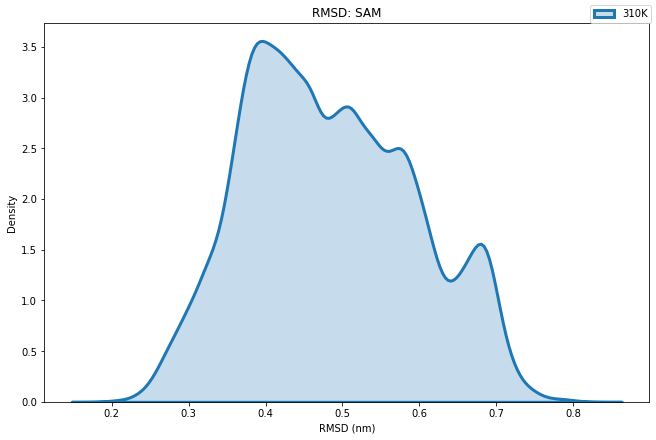

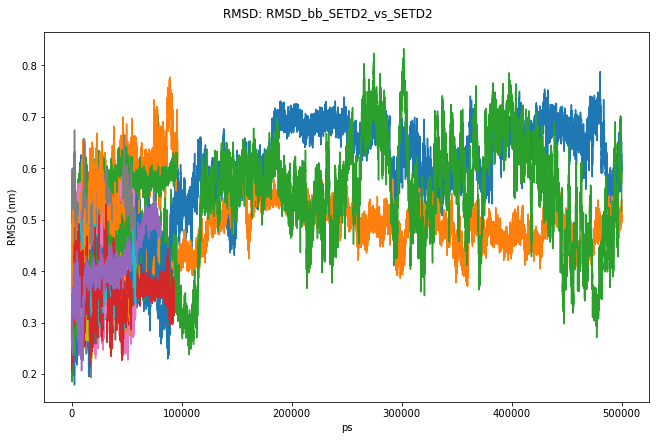

RMSD_bb_SETD2_vs_SETD2_complexed_noSub
Feature RMSD_bb_SETD2_vs_SETD2_complexed_noSub found.
Selected method: RMSD using the function "rmsd_calculation"


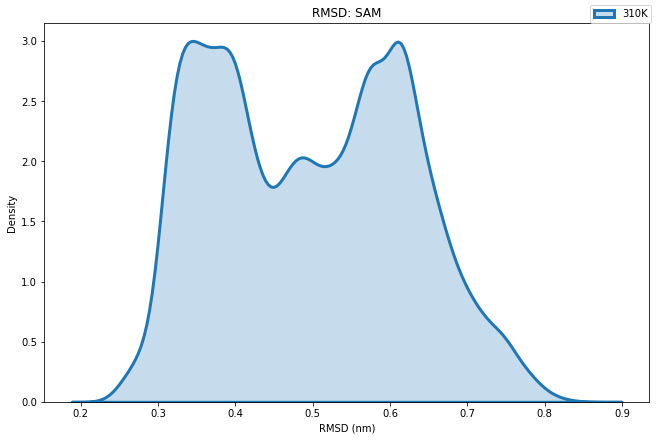

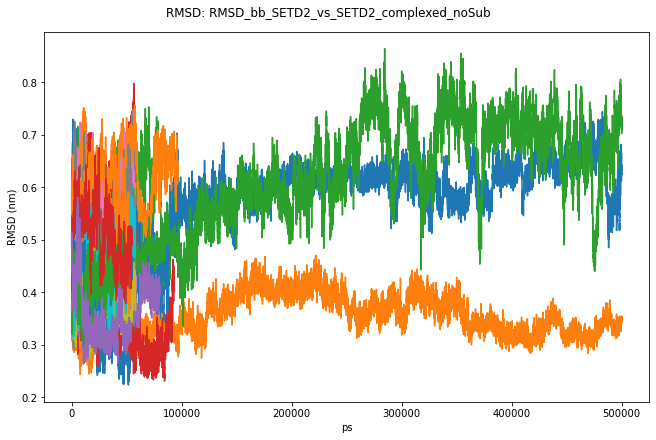

SAM-Zn
Feature SAM-Zn found.
Selected method: distance using the function "distance_calculation"


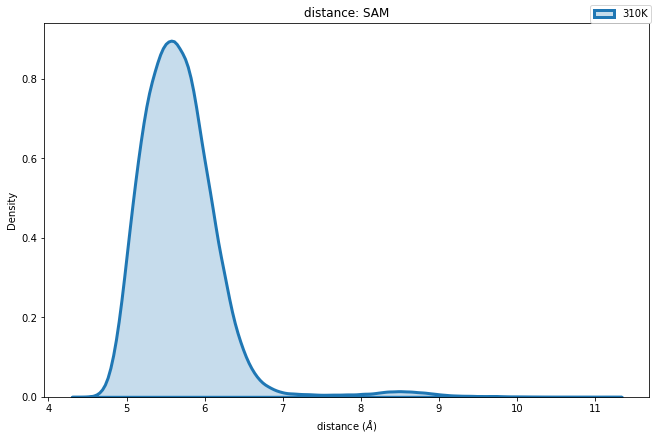

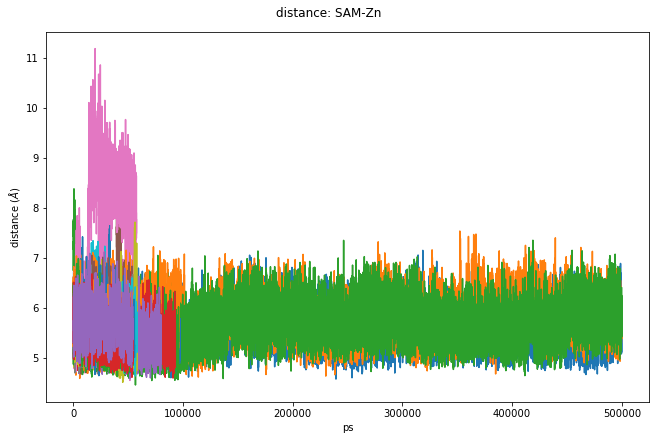

R1670_SAM
Feature R1670_SAM found.
Selected method: distance using the function "distance_calculation"


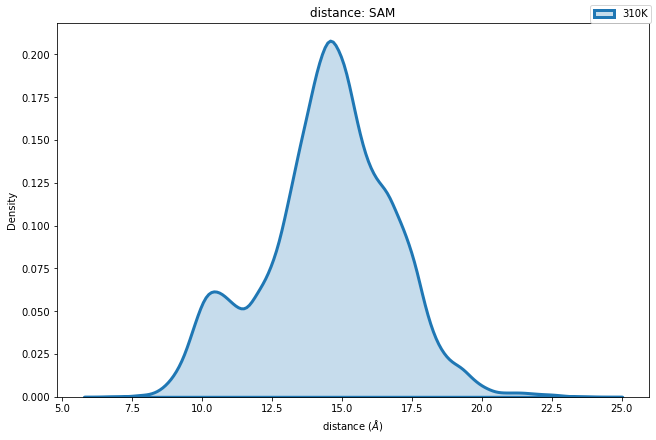

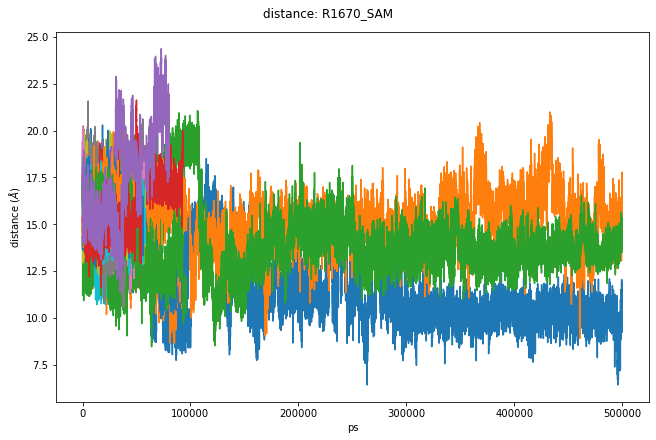

RMSF_Ca
Feature RMSF_Ca found.
Selected method: RMSF using the function "rmsf_calculation"


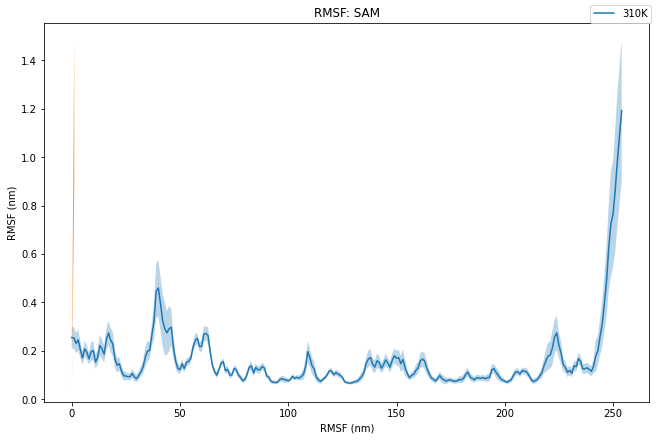

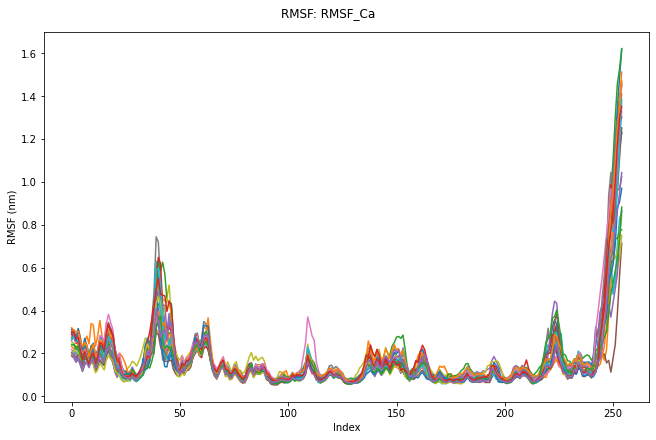

postSET-SETcd
Feature postSET-SETcd found.
Selected method: distance using the function "distance_calculation"


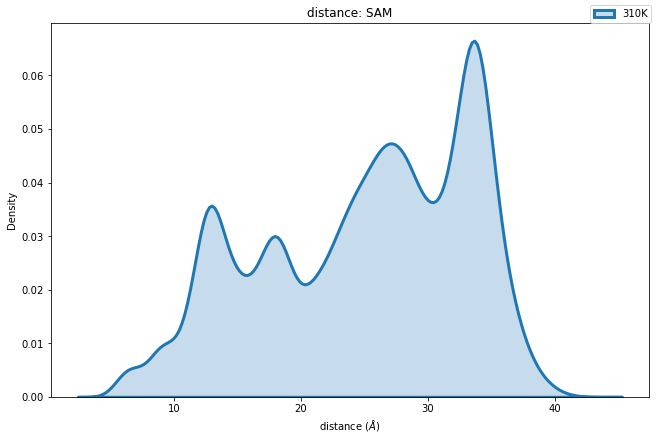

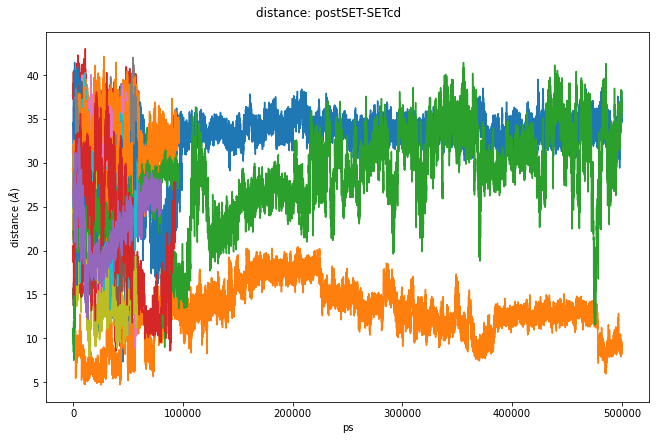

In [12]:

for k, v in featurize.features.items():
    print(k)
    featurize.plot(input_df=v, level=2, feature_name=k, subplots_=False)

In [13]:
importlib.reload(MSM)
kinetic_models_={}

protein_regions = {'loop_IN' : 'resid 240 to 255',
                   'post_SET_domain' : 'resid 220 to 240',
                   'combined' : 'resid 220 to 254',
                   'loopIN_SETcd' : ('resid 248 and sidechain', 'resid 136 to 147 and sidechain'),
                    'SETcd_helix' : 'resid 136 to 147'}

features_to_extract=['torsions', 'positions', 'min_dist', 'contacts']

kinetics=MSM.MSM(project_systems, results=results, timestep=timestep, stride=1)
for name, region in protein_regions.items():
        kinetic_models_[name]=kinetics.calculate(region,
                                                 method='TICA',
                                                 features=features_to_extract, 
                                                 ft_name=name, 
                                                 lags=200)

Results will be stored under:  /media/dataHog/hca/SETD2/results
Extracting feature:  torsions
	Loading data for 56 dimensions
Extracting feature:  positions
	Loading data for 654 dimensions


KeyboardInterrupt: 